In [ ]:
#LÀM SẠCH FILE CUSTOMER
import pandas as pd


# Đọc file customer.csv
customer_df = pd.read_csv('/content/drive/MyDrive/Lập trình - Nhóm 1/Dataset/customer.csv')

# Xóa các hàng có giá trị 'NULL' trong cột Age
customer_df_cleaned = customer_df[customer_df['Age'] != 'NULL']


# Lưu dữ liệu đã làm sạch vào file mới
customer_file_cleaned = 'cleaned_customer.csv'
customer_df_cleaned.to_csv(customer_file_cleaned, index=False)


# Tải file đã làm sạch về máy
from google.colab import files
files.download(customer_file_cleaned)


print("Đã xóa các hàng chứa 'NULL' trong cột Age và tải file về máy.")



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Kết quả đã được lưu và tải về máy dưới tên 'revenue_by_city_all.csv'.


In [ ]:
#LÀM SẠCH FILE PRODUCT
import pandas as pd


# Đọc file product.csv
product_df = pd.read_csv('/content/drive/MyDrive/Lập trình - Nhóm 1/Dataset/product.csv')


# Xử lý cột UnitCost: thay ',' bằng '.' và chuyển sang kiểu float
product_df['UnitCost'] = product_df['UnitCost'].str.replace(',', '.').astype(float)


# Kiểm tra kết quả
print(product_df.dtypes)
print(product_df.head())


# Lưu dữ liệu đã xử lý vào file mới
product_file_cleaned = 'processed_product.csv'
product_df.to_csv(product_file_cleaned, index=False)


# Tải file đã xử lý về máy
from google.colab import files
files.download(product_file_cleaned)


print("Đã chuyển đổi cột UnitCost thành kiểu số và tải file về máy."

In [ ]:
#LÀM SẠCH FILE INVOICE
import pandas as pd
from google.colab import files


# Đọc file invoices.csv
invoices_df = pd.read_csv('/content/drive/MyDrive/Lập trình - Nhóm 1/Dataset/invoice.csv')


# 1. Chuyển đổi cột UnitPrice thành số (thay ',' bằng '.')
invoices_df['UnitPrice'] = invoices_df['UnitPrice'].str.replace(',', '.').astype(float)


# 2. Định dạng lại cột SaleDate thành kiểu ngày tháng năm
invoices_df['SaleDate'] = pd.to_datetime(invoices_df['SaleDate'], errors='coerce')


# 3. Xử lý gộp các giá trị SaleReason thành các cột mới
# Xác định các cột cần nhóm (trừ cột SaleReason)
columns_to_check = list(invoices_df.columns.difference(['SaleReason']))
grouped = invoices_df.groupby(columns_to_check, dropna=False)


# Hàm gộp các giá trị SaleReason thành các cột mới
def combine_sale_reasons(group):
   reasons = group['SaleReason'].tolist()
   for i in range(len(reasons)):
       group[f'SaleReason{i+1}'] = reasons[i]
   return group.iloc[[0]]  # Chỉ giữ 1 dòng đại diện cho mỗi nhóm


# Áp dụng hàm gộp cho các nhóm và reset chỉ mục
invoices_df_combined = grouped.apply(combine_sale_reasons).reset_index(drop=True)


# Kiểm tra kết quả
print(invoices_df_combined.head())


# Lưu dữ liệu đã xử lý vào file mới
invoices_file_cleaned = 'processed_invoices.csv'
invoices_df_combined.to_csv(invoices_file_cleaned, index=False)


# Tải file đã xử lý về máy
files.download(invoices_file_cleaned)


print("Đã xử lý dữ liệu và tải file về máy.")


PHÂN TÍCH KINH DOANH

In [ ]:
#KIỂM TRA KHOẢNG THỜI GIAN CỦA DỮ LIỆU
import pandas as pd


# Đọc dữ liệu từ file CSV
invoices_df = pd.read_csv('/content/drive/MyDrive/Lập trình - Nhóm 1/Dataset/processed_invoice.csv')


# Chuyển cột SaleDate thành kiểu datetime nếu chưa
invoices_df['SaleDate'] = pd.to_datetime(invoices_df['SaleDate'])


# Tạo một cột mới để lấy tháng và năm từ SaleDate
invoices_df['YearMonth'] = invoices_df['SaleDate'].dt.to_period('M')


# Lấy ra các năm duy nhất
unique_years = invoices_df['SaleDate'].dt.year.unique()


# In số lượng và danh sách các năm
print(f"Có {len(unique_years)} năm trong cột SaleDate: {sorted(unique_years)}")


# Trình bày theo từng năm
for year in sorted(unique_years):
   print(f"\nTháng và năm trong {year}:")
   year_data = invoices_df[invoices_df['SaleDate'].dt.year == year]
   unique_months_in_year = year_data['YearMonth'].unique()
   print(sorted(unique_months_in_year))


TỔNG QUAN KẾT QUẢ KINH DOANH


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
df = pd.read_csv("/content/processed_customer.csv")
df_customer = pd.DataFrame(df)


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df_customer.info()
df_customer.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19972 entries, 0 to 19971
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CustomerID    19972 non-null  int64  
 1   CustomerName  19972 non-null  object 
 2   Age           18484 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 468.2+ KB


,CustomerID,CustomerName,Age
0,285,Syed E Abbas,NaN
1,293,Catherine R. Abel,NaN
2,295,Kim Abercrombie,NaN
3,2170,Kim Abercrombie,NaN
4,38,Kim B Abercrombie,NaN


In [5]:
df1 = pd.read_csv("/content/processed_invoice.csv")
df_invoice = pd.DataFrame(df1)
df_invoice.info()
df_invoice.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60157 entries, 0 to 60156
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   OrderID      60157 non-null  int64  
 1   CustomerID   60157 non-null  int64  
 2   ProductID    60157 non-null  int64  
 3   Quantity     60157 non-null  int64  
 4   UnitPrice    60157 non-null  float64
 5   Payment      60157 non-null  object 
 6   Channel      60157 non-null  object 
 7   City         12176 non-null  object 
 8   SaleDate     60157 non-null  object 
 9   SaleReason   19431 non-null  object 
 10  SaleReason1  19431 non-null  object 
 11  SaleReason2  3622 non-null   object 
 12  SaleReason3  151 non-null    object 
dtypes: float64(1), int64(4), object(8)
memory usage: 6.0+ MB


,OrderID,CustomerID,ProductID,Quantity,UnitPrice,Payment,Channel,City,SaleDate,SaleReason,SaleReason1,SaleReason2,SaleReason3
0,44132,29484,778,2,2024.9940,NonCreditCard,Offline,NaN,2011-08-01,NaN,NaN,NaN,NaN
1,45579,29484,774,2,2039.9940,NonCreditCard,Offline,NaN,2012-01-29,NaN,NaN,NaN,NaN
2,46389,29484,773,2,849.9975,NonCreditCard,Offline,NaN,2012-04-30,NaN,NaN,NaN,NaN
3,47454,29484,707,4,20.1865,NonCreditCard,Offline,NaN,2012-07-31,NaN,NaN,NaN,NaN
4,47454,29484,708,7,20.1865,NonCreditCard,Offline,NaN,2012-07-31,NaN,NaN,NaN,NaN


In [6]:
df2 = pd.read_csv("/content/processed_product.csv")
df_product = pd.DataFrame(df2)
df_product.info()
df_product.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606 entries, 0 to 605
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    606 non-null    int64  
 1   ProductName  606 non-null    object 
 2   UnitCost     395 non-null    float64
 3   Category     606 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 19.1+ KB


,ProductID,ProductName,UnitCost,Category
0,1,Adjustable Race,NaN,Accessories
1,2,Bearing Ball,NaN,Accessories
2,3,BB Ball Bearing,NaN,Accessories
3,4,Headset Ball Bearings,NaN,Accessories
4,316,Blade,NaN,Accessories


In [7]:
# Merge datasets
merged_invoice_product = pd.merge(df_invoice, df_product, on='ProductID', how='left') #Gộp hai bảng, chỉ giữ lại cột productID nằm bên trái

# Calculate Revenue and Profit -> thêm hai cột R và P vào bảng vừa gộp
merged_invoice_product['Revenue'] = merged_invoice_product['Quantity'] * merged_invoice_product['UnitPrice']
merged_invoice_product['Profit'] = merged_invoice_product['Revenue'] - (merged_invoice_product['Quantity'] * merged_invoice_product['UnitCost'])

In [8]:
merged_invoice_product.head()

,OrderID,CustomerID,ProductID,Quantity,UnitPrice,Payment,Channel,City,SaleDate,SaleReason,SaleReason1,SaleReason2,SaleReason3,ProductName,UnitCost,Category,Revenue,Profit
0,44132,29484,778,2,2024.9940,NonCreditCard,Offline,NaN,2011-08-01,NaN,NaN,NaN,NaN,"Mountain-100 Black, 48",1898.0944,Bikes,4049.988,253.7992
1,45579,29484,774,2,2039.9940,NonCreditCard,Offline,NaN,2012-01-29,NaN,NaN,NaN,NaN,"Mountain-100 Silver, 48",1912.1544,Bikes,4079.988,255.6792
2,46389,29484,773,2,849.9975,NonCreditCard,Offline,NaN,2012-04-30,NaN,NaN,NaN,NaN,"Mountain-100 Silver, 44",1912.1544,Bikes,1699.995,-2124.3138
3,47454,29484,707,4,20.1865,NonCreditCard,Offline,NaN,2012-07-31,NaN,NaN,NaN,NaN,"Sport-100 Helmet, Red",12.0278,Accessories,80.746,32.6348
4,47454,29484,707,4,20.1865,NonCreditCard,Offline,NaN,2012-07-31,NaN,NaN,NaN,NaN,"Sport-100 Helmet, Red",13.8782,Accessories,80.746,25.2332


In [9]:
# Extract Year from SaleDate
merged_invoice_product['SaleDate'] = pd.to_datetime(df_invoice['SaleDate']) #chuyển cột Saledate sang kiểu dữ liệu thời gian
merged_invoice_product['Year'] = merged_invoice_product['SaleDate'].dt.year #tạo cột Year vào bảng gộp ở trên bằng cách trích năm từ cột Saledate

In [10]:
# Aggregate data by year ->lập bảng dữ liệu theo năm
yearly_data = merged_invoice_product.groupby('Year').agg({
    'Revenue': 'sum', #cột Revenue sẽ bằng tổng giá trị trong năm
    'Profit': 'sum', #cột Revenue bằng tổng giá trị trong năm
    'OrderID': 'nunique',  # Unique orders -> đếm số lượng chính xác của các đơn hàng, vì trong dataset nhiều hàng có cùng OrderID nên bị trùng, tương tự với customers
    'CustomerID': 'nunique'  # Unique customers
}).reset_index()

In [11]:
yearly_data.head() # Đưa các bảng như này vào docs (để người đọc dễ hình dung kết quả của các bước xử lý trên và cách trích xuất từ bảng để vẽ chart ở dưới)

,Year,Revenue,Profit,OrderID,CustomerID
0,2011.0,5.434519e+06,111593.2086,345,141
1,2012.0,1.906045e+07,475327.9487,992,233
2,2013.0,3.486352e+07,845633.2857,1560,308
3,2014.0,2.014838e+07,526728.9886,1140,265


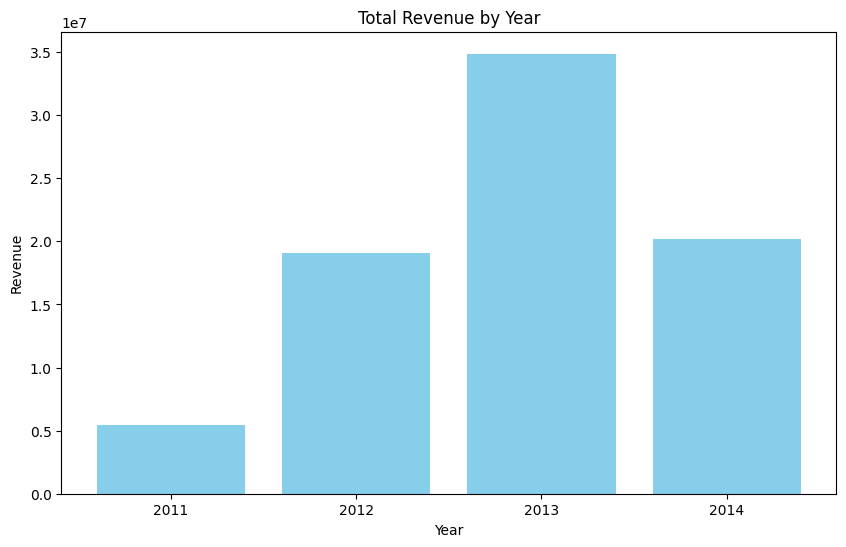

In [12]:
# Plot Total Revenue by Year -> giải thích từng dòng code có chức năng gì (vd: set tên cho cột dọc ,...), đối với từng dạng biểu đồ chỉ cần giải thích cho cái chart đầu tiên
plt.figure(figsize=(10, 6))
plt.bar(yearly_data['Year'], yearly_data['Revenue'], color='skyblue')
plt.title('Total Revenue by Year')
plt.xlabel('Year')
plt.ylabel('Revenue')
plt.xticks(yearly_data['Year'])
plt.show()

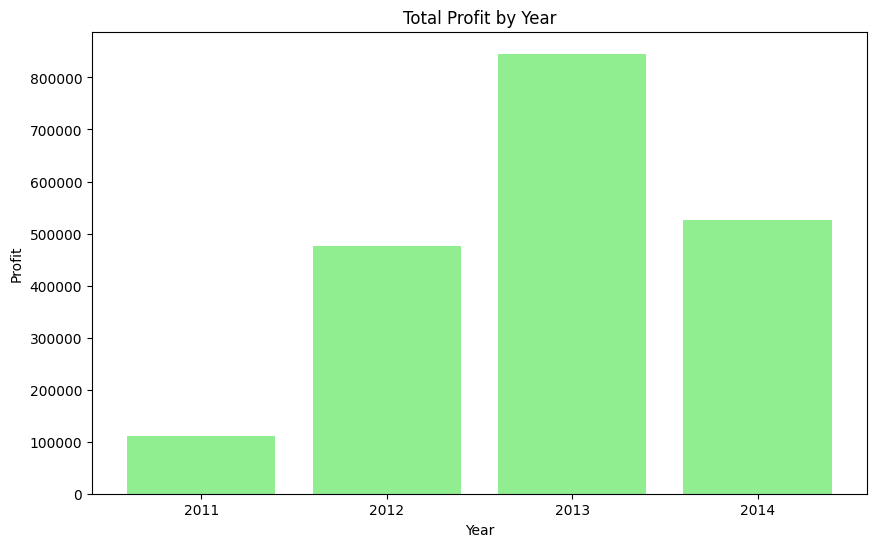

In [13]:
# Plot Total Profit by Year
plt.figure(figsize=(10, 6))
plt.bar(yearly_data['Year'], yearly_data['Profit'], color='lightgreen')
plt.title('Total Profit by Year')
plt.xlabel('Year')
plt.ylabel('Profit')
plt.xticks(yearly_data['Year'])
plt.show()

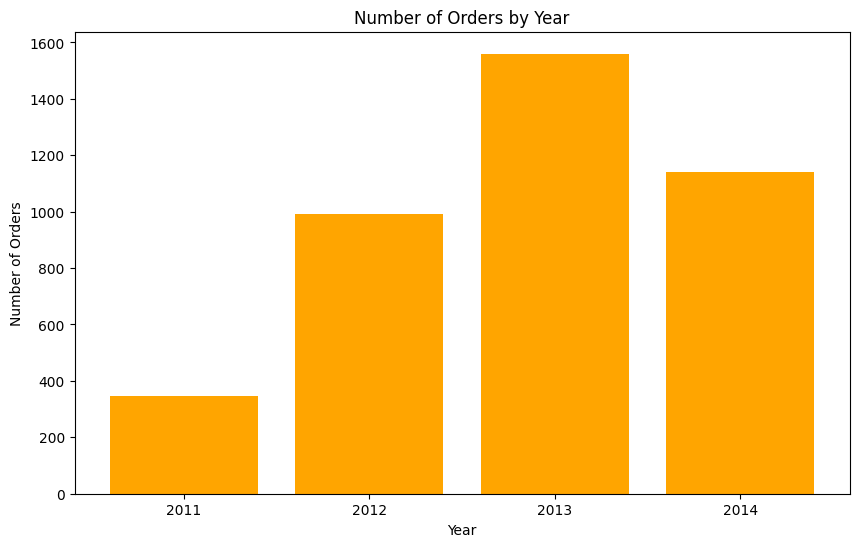

In [14]:
# Plot Number of Orders by Year
plt.figure(figsize=(10, 6))
plt.bar(yearly_data['Year'], yearly_data['OrderID'], color='orange')
plt.title('Number of Orders by Year')
plt.xlabel('Year')
plt.ylabel('Number of Orders')
plt.xticks(yearly_data['Year'])
plt.show()

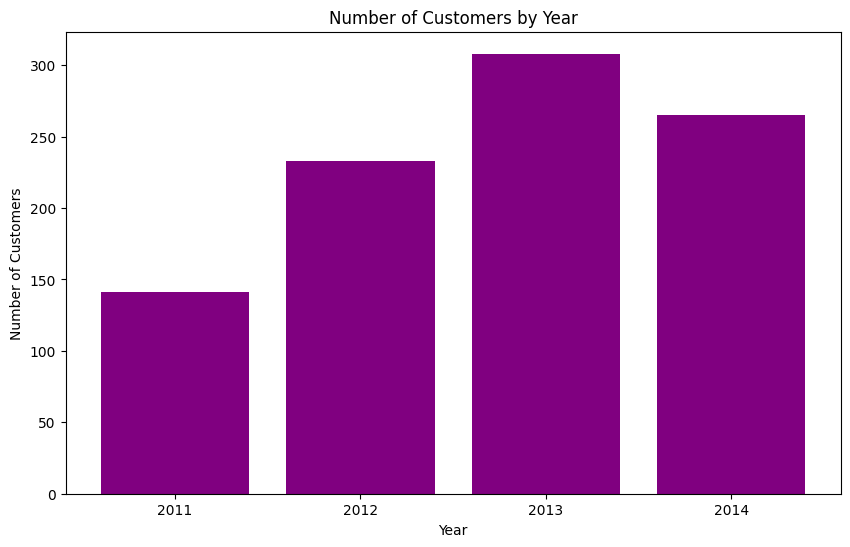

In [15]:
# Plot Number of Customers by Year
plt.figure(figsize=(10, 6))
plt.bar(yearly_data['Year'], yearly_data['CustomerID'], color='purple')
plt.title('Number of Customers by Year')
plt.xlabel('Year')
plt.ylabel('Number of Customers')
plt.xticks(yearly_data['Year'])
plt.show()

In [16]:
# Extract Year and Month -> giải thích tương tự như trên
merged_invoice_product['YearMonth'] = merged_invoice_product['SaleDate'].dt.to_period('M')

In [17]:
# Group by YearMonth and aggregate metrics -> giải thích tương tự như trên
monthly_data = merged_invoice_product.groupby('YearMonth').agg({
    'Revenue': 'sum',       # Total Revenue
    'Profit': 'sum',        # Total Profit
    'OrderID': 'nunique',   # Number of Unique Orders
    'CustomerID': 'nunique' # Number of Unique Customers
}).reset_index()

In [18]:
# Rename columns for clarity -> bước này chỉ là đặt tên lại cho các cột để dễ hiểu thui
monthly_data.rename(columns={
    'Revenue': 'Total Revenue',
    'Profit': 'Total Profit',
    'OrderID': 'Number of Orders',
    'CustomerID': 'Number of Customers'
}, inplace=True)

In [19]:
monthly_data.head(5)

,YearMonth,Total Revenue,Total Profit,Number of Orders,Number of Customers
0,2011-05,3.327835e+05,9791.3586,43,30
1,2011-06,4.133652e+04,1777.1704,16,9
2,2011-07,1.062733e+06,22971.2686,73,50
3,2011-08,1.289014e+06,28093.3791,116,72
4,2011-09,9.268998e+04,1331.5097,21,10


In [20]:
# Convert YearMonth to string for plotting -> chuyển cột Yearmonth sang kiểu dữ liệu string để vẽ chart (chart yêu cầu dòng đơn vị phải là dạng string mới vẽ đc)
monthly_data['YearMonth'] = monthly_data['YearMonth'].astype(str)

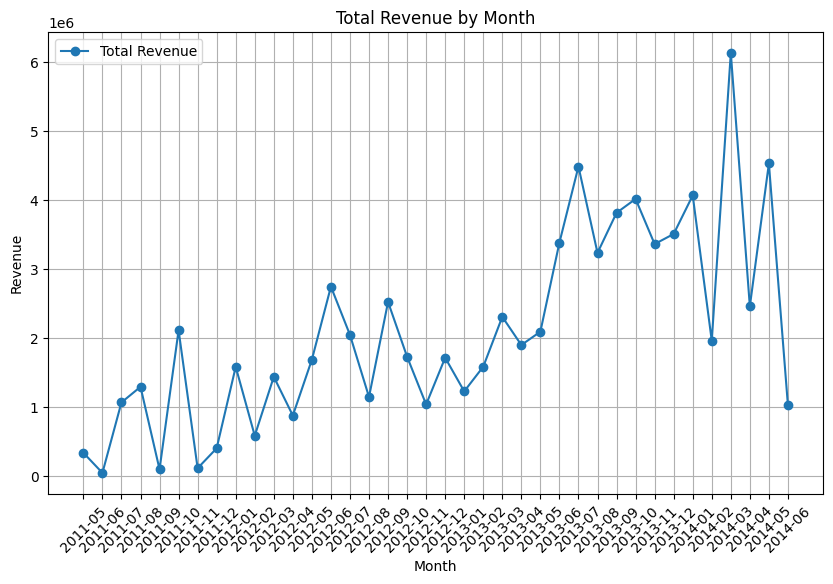

In [21]:
# Visualize Total Revenue by month -> giải thích tương tự như trên
plt.figure(figsize=(10, 6))
plt.plot(monthly_data['YearMonth'], monthly_data['Total Revenue'], marker='o', label='Total Revenue')
plt.title('Total Revenue by Month')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()

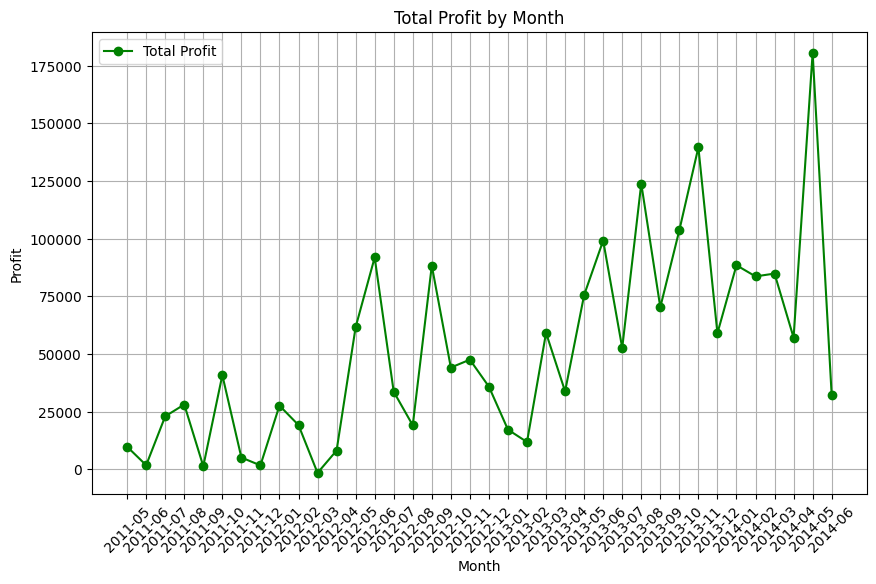

In [22]:
# Visualize Total Revenue Profit by month
plt.figure(figsize=(10, 6))
plt.plot(monthly_data['YearMonth'], monthly_data['Total Profit'], marker='o', color='green', label='Total Profit')
plt.title('Total Profit by Month')
plt.xlabel('Month')
plt.ylabel('Profit')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()

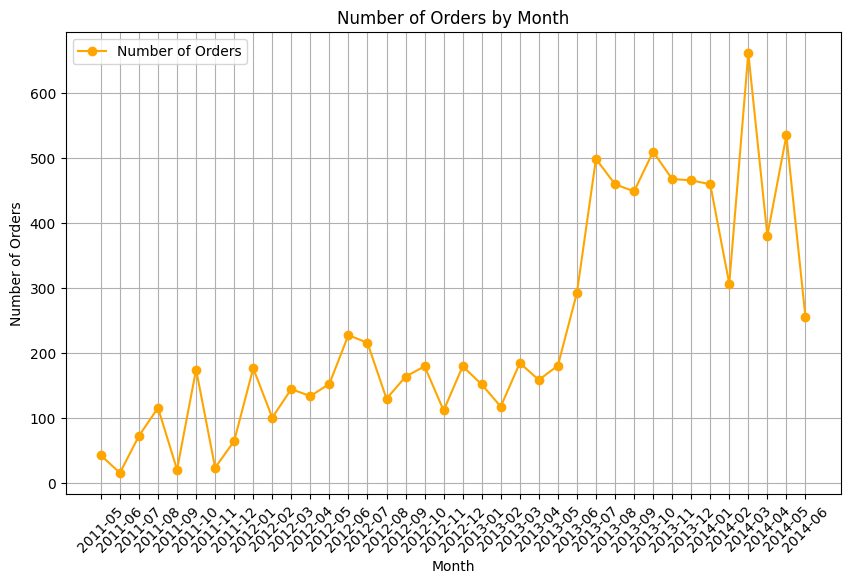

In [23]:
# Visualize Number of Orders by month
plt.figure(figsize=(10, 6))
plt.plot(monthly_data['YearMonth'], monthly_data['Number of Orders'], marker='o', color='orange', label='Number of Orders')
plt.title('Number of Orders by Month')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()

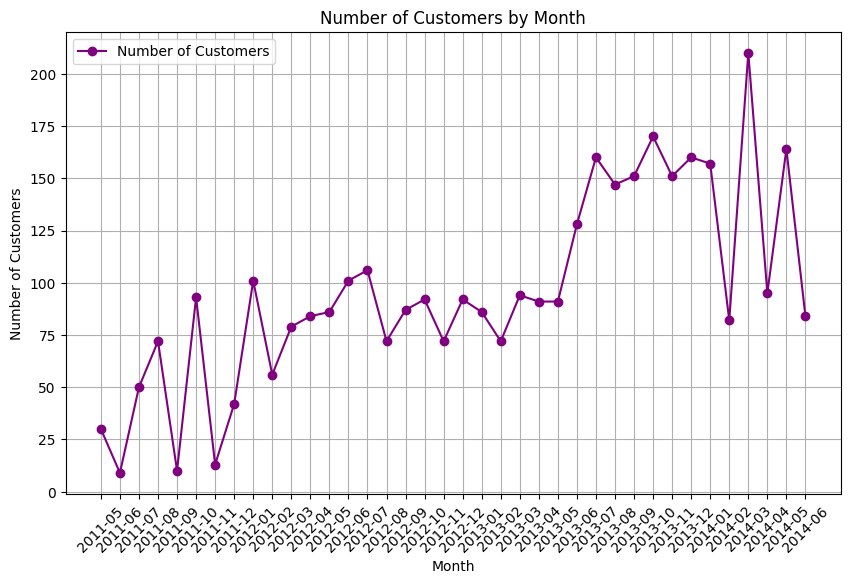

In [24]:
# Visualize Total Customer by month
plt.figure(figsize=(10, 6))
plt.plot(monthly_data['YearMonth'], monthly_data['Number of Customers'], marker='o', color='purple', label='Number of Customers')
plt.title('Number of Customers by Month')
plt.xlabel('Month')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()


In [25]:
# Group and Aggregate by Channel -> giải thích tương tự như trên
channel_comparison = merged_invoice_product.groupby('Channel').agg({
    'Revenue': 'sum',
    'Profit': 'sum'
}).reset_index()

# Group and Aggregate by Payment -> giải thích tương tự như trên
payment_comparison = merged_invoice_product.groupby('Payment').agg({
    'Revenue': 'sum'
}).reset_index()

In [26]:
payment_comparison.head()

,Payment,Revenue
0,CreditCard,9.738358e+07
1,NonCreditCard,7.111644e+05


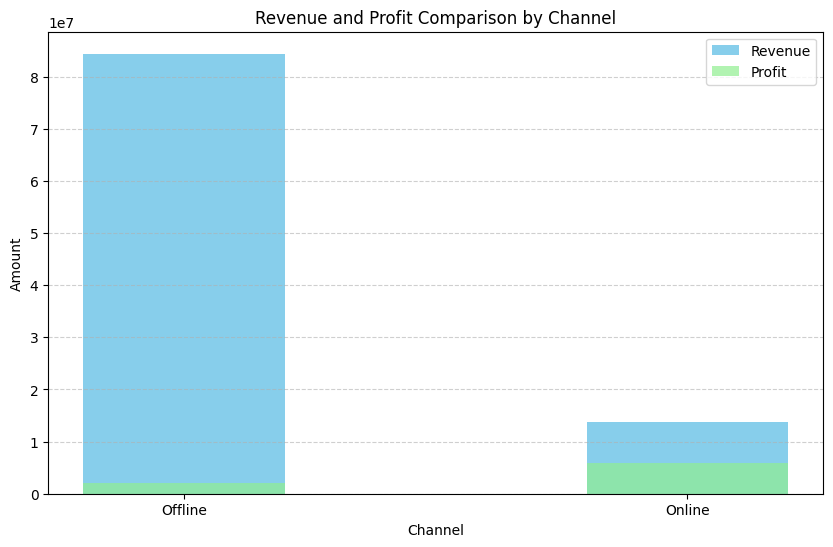

In [27]:
# Compare Revenue and Profit Between Online and Offline -> giải thích chứ năng từng dòng code
plt.figure(figsize=(10, 6))
x = channel_comparison['Channel']
width = 0.4

plt.bar(x, channel_comparison['Revenue'], width, label='Revenue', color='skyblue')
plt.bar(x, channel_comparison['Profit'], width, label='Profit', color='lightgreen', alpha=0.7)

plt.title('Revenue and Profit Comparison by Channel')
plt.xlabel('Channel')
plt.ylabel('Amount')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

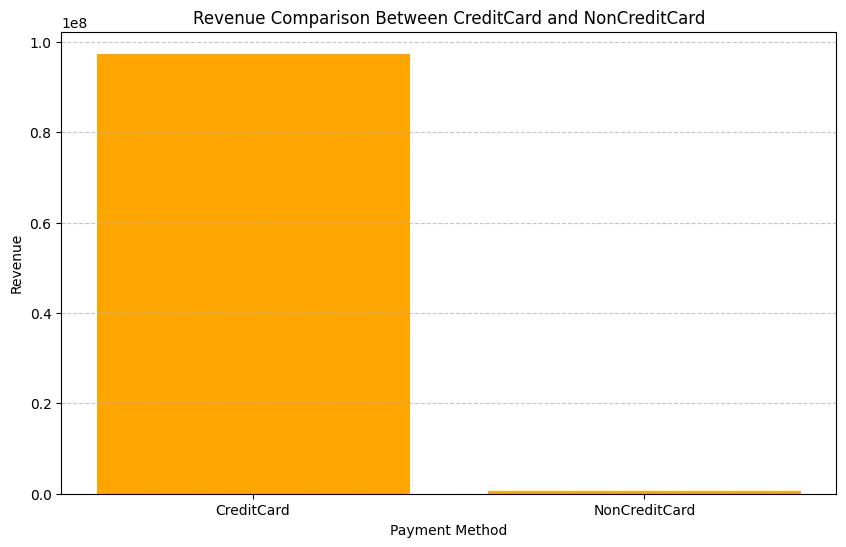

In [28]:
# Compare Revenue Between CreditCard and NonCreditCard
plt.figure(figsize=(10, 6))
plt.bar(payment_comparison['Payment'], payment_comparison['Revenue'], color='orange')
plt.title('Revenue Comparison Between CreditCard and NonCreditCard')
plt.xlabel('Payment Method')
plt.ylabel('Revenue')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

KẾT QUẢ KINH DOANH THEO SẢN PHẨM

In [ ]:
#TÍNH DOANH THU LỢI NHUẬN THEO SẢN PHẨM CHO CATEGORY BIKES TRONG 2011
import pandas as pd


# Đọc dữ liệu từ các file CSV
invoices_df = pd.read_csv('/content/drive/MyDrive/Lập trình - Nhóm 1/Dataset/processed_invoice.csv')
product_df = pd.read_csv('/content/drive/MyDrive/Lập trình - Nhóm 1/Dataset/processed_product.csv')
customer_df = pd.read_csv('/content/drive/MyDrive/Lập trình - Nhóm 1/Dataset/processed_customer.csv')


# Kết hợp dữ liệu từ invoices và product dựa trên ProductID
merged_df = pd.merge(invoices_df, product_df, on='ProductID')


# Chuyển cột SaleDate thành kiểu datetime
merged_df['SaleDate'] = pd.to_datetime(merged_df['SaleDate'])


# Lọc các dữ liệu có năm 2011
merged_df_2011 = merged_df[merged_df['SaleDate'].dt.year == 2011]


# Lọc các sản phẩm có Category = 'Bikes'
bikes_df = merged_df_2011[merged_df_2011['Category'] == 'Bikes']


# Tính doanh thu (Revenue) và lợi nhuận (Profit)
bikes_df['Revenue'] = bikes_df['Quantity'] * bikes_df['UnitPrice']
bikes_df['Profit'] = bikes_df['Quantity'] * bikes_df['UnitPrice'] - bikes_df['Quantity'] * bikes_df['UnitCost']


# Tính toán doanh thu và lợi nhuận tổng cộng theo ProductName
result_df = bikes_df.groupby('ProductName').agg(
    TotalRevenue=('Revenue', 'sum'),
    TotalProfit=('Profit', 'sum')
).reset_index()


# Sắp xếp theo TotalRevenue giảm dần
result_df_sorted = result_df.sort_values(by='TotalRevenue', ascending=False)


# Hiển thị kết quả
print(result_df_sorted)


# Lưu kết quả vào file mới
result_file = 'bikes_revenue_profit_2011.csv'
result_df_sorted.to_csv(result_file, index=False)


# Tải file đã xử lý về máy
from google.colab import files
files.download(result_file)


print("Đã tính toán doanh thu và lợi nhuận cho Bikes năm 2011, tải file kết quả về máy.")


In [ ]:
#TÍNH TƯƠNG QUAN GIỮA CÁC SẢN PHẨM KHÁC VÀ BIKES
import pandas as pd


# Đọc dữ liệu từ các file CSV
invoices_df = pd.read_csv('/content/drive/MyDrive/Lập trình - Nhóm 1/Dataset/processed_invoice.csv')
product_df = pd.read_csv('/content/drive/MyDrive/Lập trình - Nhóm 1/Dataset/processed_product.csv')


# Kết hợp dữ liệu từ invoices và product dựa trên ProductID
merged_df = pd.merge(invoices_df, product_df, on='ProductID')


# Lọc dữ liệu chỉ lấy Category 'Components'
components_df = merged_df[merged_df['Category'] == 'Components']


# Lấy danh sách các ProductName thuộc Category 'Components'
components_products = components_df['ProductName'].unique()


# Tổng số OrderID (tính duy nhất)
total_order_ids = merged_df['OrderID'].nunique()


# Lọc dữ liệu chỉ lấy Category 'Bikes'
bikes_df = merged_df[merged_df['Category'] == 'Bikes']


# Tổng số OrderID có xuất hiện Category 'Bikes'
total_bikes_order_ids = bikes_df['OrderID'].nunique()


# Tạo danh sách kết quả
result = []


# Tính toán cho từng ProductName trong Category 'Components'
for product in components_products:
   # Số lượng OrderID có xuất hiện ProductName trong Category 'Components'
   orders_with_product = merged_df[merged_df['ProductName'] == product]['OrderID'].nunique()

   # Số lượng OrderID có cả ProductName (Components) và Category 'Bikes'
   orders_with_bikes_and_product = merged_df[
       (merged_df['ProductName'] == product) & (merged_df['OrderID'].isin(bikes_df['OrderID']))
   ]['OrderID'].nunique()

   # Tỷ lệ cột 2
   ratio_1 = orders_with_product / total_order_ids

   # Tỷ lệ cột 3
   ratio_2 = orders_with_bikes_and_product / total_bikes_order_ids if total_bikes_order_ids > 0 else 0

   # Lưu vào danh sách kết quả
   result.append({'ProductName': product, 'Ratio1': ratio_1, 'Ratio2': ratio_2})


# Tạo DataFrame kết quả
result_df = pd.DataFrame(result)


# Hiển thị kết quả
print(result_df)


# Lưu kết quả vào file CSV
result_df.to_csv('components_bikes_ratios.csv', index=False)


# Tải file CSV về máy
from google.colab import files
files.download('components_bikes_ratios.csv')


print("Đã tính toán tỷ lệ và lưu kết quả vào file.")


In [ ]:
#DOANH THU THEO CITY

import pandas as pd
from google.colab import files

# Đọc dữ liệu từ các tệp CSV
invoice_df = pd.read_csv('/content/drive/MyDrive/Lập trình - Nhóm 1/Dataset/processed_invoice.csv')
product_df = pd.read_csv('/content/drive/MyDrive/Lập trình - Nhóm 1/Dataset/processed_product.csv')
customer_df = pd.read_csv('/content/drive/MyDrive/Lập trình - Nhóm 1/Dataset/processed_customer.csv')

# Chuyển đổi cột 'SaleDate' thành kiểu dữ liệu datetime và lọc ra năm 2013
invoice_df['SaleDate'] = pd.to_datetime(invoice_df['SaleDate'])
invoice_2013_df = invoice_df[invoice_df['SaleDate'].dt.year == 2013]

# Tính doanh thu (Revenue) = Quantity * UnitPrice
invoice_2013_df['Revenue'] = invoice_2013_df['Quantity'] * invoice_2013_df['UnitPrice']

# Kết hợp với dữ liệu 'product.csv' để lấy thêm thông tin sản phẩm
merged_df = pd.merge(invoice_2013_df, product_df, on='ProductID', how='left')

# Tính tổng doanh thu theo thành phố (City)
revenue_by_city = merged_df.groupby('City')['Revenue'].sum().reset_index()

# Lưu kết quả vào một tệp CSV
output_file = '/content/revenue_by_city_2013.csv'
revenue_by_city.to_csv(output_file, index=False)

# Tải tệp về máy
files.download(output_file)

# Thông báo cho người dùng
print("Kết quả đã được lưu và tải về máy dưới tên 'revenue_by_city_2013.csv'.")


PHÂN TÍCH KHÁCH HÀNG THEO MÔ HÌNH RFM

In [ ]:
import pandas as pd
from google.colab import files

# Đọc dữ liệu từ các file CSV
invoices = pd.read_csv('/content/drive/MyDrive/Lập trình - Nhóm 1/Dataset/processed_invoice.csv')
products = pd.read_csv('/content/drive/MyDrive/Lập trình - Nhóm 1/Dataset/processed_product.csv')
customers = pd.read_csv('/content/drive/MyDrive/Lập trình - Nhóm 1/Dataset/processed_customer.csv')

# Tính toán Revenue (Quantity * UnitPrice)
invoices['Revenue'] = invoices['Quantity'] * invoices['UnitPrice']

# Lọc 3 cột: CustomerID, SaleDate, Revenue
result = invoices[['CustomerID', 'SaleDate', 'Revenue']]

# Xem kết quả
print(result.head())


In [ ]:
import pandas as pd
import numpy as np
import datetime as dt

# Đọc dữ liệu từ file CSV
df = result

# Chuyển đổi cột SaleDate thành định dạng datetime
df['SaleDate'] = pd.to_datetime(df['SaleDate'])

# Lọc dữ liệu chỉ lấy các giao dịch trong năm 2012 và 2013
df = df[df['SaleDate'].dt.year == 2013]

# Định nghĩa ngày nghiên cứu (study date)
study_date = dt.datetime(2014, 1, 1)  # Ngày hiện tại hoặc ngày bạn muốn xem xét

# Bước 1: Tính Recency (số ngày kể từ giao dịch cuối cùng đến ngày nghiên cứu)
df['Recency'] = (study_date - df['SaleDate']).dt.days

# Bước 2: Tính Frequency (số lần giao dịch của mỗi khách hàng)
frequency = df.groupby('CustomerID')['SaleDate'].count()

# Bước 3: Tính Monetary (tổng doanh thu của mỗi khách hàng)
monetary = df.groupby('CustomerID')['Revenue'].sum()

# Ghép dữ liệu Recency, Frequency, và Monetary vào một bảng
rfm_df = pd.DataFrame({
    'CustomerID': df.groupby('CustomerID')['Recency'].min().index,  # Thêm cột CustomerID
    'Recency': df.groupby('CustomerID')['Recency'].min(),
    'Frequency': frequency,
    'Monetary': monetary
})

# Bước 4: Tính phân vị (quartiles) để phân loại RFM
quartiles = rfm_df.quantile(q=[0.25, 0.50, 0.75]).to_dict()

# Hàm phân loại Recency (R)
def RClass(x, p, d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4

# Hàm phân loại Frequency và Monetary (F, M)
def FMClass(x, p, d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1

# Áp dụng phân loại RFM
rfm_df['R_Quartile'] = rfm_df['Recency'].apply(RClass, args=('Recency', quartiles))
rfm_df['F_Quartile'] = rfm_df['Frequency'].apply(FMClass, args=('Frequency', quartiles))
rfm_df['M_Quartile'] = rfm_df['Monetary'].apply(FMClass, args=('Monetary', quartiles))

# Bước 5: Tạo điểm RFM kết hợp
rfm_df['RFMClass'] = rfm_df['R_Quartile'].astype(str) + \
                     rfm_df['F_Quartile'].astype(str) + \
                     rfm_df['M_Quartile'].astype(str)

# Bước 6: Sắp xếp theo điểm RFM và doanh thu (Monetary)
rfm_df = rfm_df.sort_values(by=['RFMClass', 'Monetary'], ascending=[True, False])

# Bước 7: Thêm cột Totalscore tính tổng các giá trị R_Quartile, F_Quartile, M_Quartile
rfm_df['Totalscore'] = rfm_df['R_Quartile'] + rfm_df['F_Quartile'] + rfm_df['M_Quartile']

# Hiển thị kết quả với cột Totalscore
print(rfm_df.head())

# Tính toán trung bình của 'Monetary' cho mỗi nhóm 'RFMClass'
monetary_avg_by_rfmclass = rfm_df.groupby('RFMClass')['Monetary'].mean()
print(monetary_avg_by_rfmclass)

# Tính toán trung bình của 'Monetary' cho mỗi nhóm 'Total Score'
monetary_avg_by_totalscore = rfm_df.groupby('Totalscore')['Monetary'].mean()
print(monetary_avg_by_totalscore)

# Vẽ biểu đồ trung bình 'Monetary' theo 'Total Score'
import matplotlib.pyplot as plt

monetary_avg_by_totalscore.plot(kind='bar', colormap='Blues_r')
plt.title('Average Monetary Value by Total Score')
plt.xlabel('Total Score')
plt.ylabel('Average Monetary Value')
plt.show()


In [ ]:
# Tính trung bình 'Frequency' cho mỗi nhóm 'Total Score'
frequency_avg_by_totalscore = rfm_df.groupby('Totalscore')['Frequency'].mean()

# Vẽ biểu đồ trung bình 'Frequency' theo 'Total Score'
frequency_avg_by_totalscore.plot(kind='bar', colormap='Blues_r')

# Cải thiện biểu đồ
import matplotlib.pyplot as plt
plt.title('Average Frequency by Total Score')
plt.xlabel('Total Score')
plt.ylabel('Average Frequency')
plt.show()


In [ ]:
# Tính trung bình 'Recency' cho mỗi nhóm 'Total Score'
recency_avg_by_totalscore = rfm_df.groupby('Totalscore')['Recency'].mean()

# Vẽ biểu đồ trung bình 'Recency' theo 'Total Score'
recency_avg_by_totalscore.plot(kind='bar', colormap='Blues_r')

# Cải thiện biểu đồ
import matplotlib.pyplot as plt
plt.title('Average Recency by Total Score')
plt.xlabel('Total Score')
plt.ylabel('Average Recency')
plt.show()

MÔ HÌNH DỰ ĐOÁN

In [ ]:
import pandas as pd

# Bước 1: Tải dữ liệu từ các file CSV
invoice_df = pd.read_csv('/content/drive/MyDrive/Lập trình - Nhóm 1/Dataset/processed_invoice.csv')     #invoice_df: Chứa dữ liệu hóa đơn.
product_df = pd.read_csv('/content/drive/MyDrive/Lập trình - Nhóm 1/Dataset/processed_product.csv')    #product_df: Chứa dữ liệu sản phẩm.
customer_df = pd.read_csv('/content/drive/MyDrive/Lập trình - Nhóm 1/Dataset/processed_customer.csv')   #customer_df: Chứa dữ liệu khách hàng.

# Bước 2: Chuyển đổi cột SaleDate thành kiểu dữ liệu datetime
invoice_df['SaleDate'] = pd.to_datetime(invoice_df['SaleDate'])

# Bước 3: Lọc dữ liệu chỉ lấy các giao dịch từ năm 2012 và 2013
invoice_df = invoice_df[(invoice_df['SaleDate'].dt.year == 2012) | (invoice_df['SaleDate'].dt.year == 2013)].copy()

# Bước 4: Tính Recency (Số ngày kể từ giao dịch cuối cùng)
study_date = pd.to_datetime('2014-01-01')
invoice_df['Recency'] = (study_date - invoice_df['SaleDate']).dt.days

# Bước 5: Tính Frequency (Số lần giao dịch)
frequency = invoice_df.groupby('CustomerID')['SaleDate'].count()

# Bước 6: Tính Monetary (Tổng doanh thu từ các giao dịch)
invoice_df['Revenue'] = invoice_df['Quantity'] * invoice_df['UnitPrice']
monetary = invoice_df.groupby('CustomerID')['Revenue'].sum()

# Bước 7: Tạo bảng RFM với Recency, Frequency và Monetary
rfm_df = pd.DataFrame({
    'CustomerID': invoice_df.groupby('CustomerID')['Recency'].min().index,  # Cột CustomerID
    'Recency': invoice_df.groupby('CustomerID')['Recency'].min(),
    'Frequency': frequency,
    'Monetary': monetary
}).reset_index(drop=True)

# Bước 8: Thêm thông tin Payment
payment_df = invoice_df[invoice_df['Payment'] == 'CreditCard'].groupby('CustomerID').size().reset_index(name='Count')
payment_df['Payment'] = 1  # Gán giá trị 1 cho khách hàng thanh toán bằng CreditCard
rfm_df = pd.merge(rfm_df, payment_df[['CustomerID', 'Payment']], on='CustomerID', how='left')
rfm_df['Payment'] = rfm_df['Payment'].fillna(0)  # Gán giá trị 0 cho khách hàng không dùng CreditCard

# Bước 9: Thêm thông tin Channel
channel_df = invoice_df[invoice_df['Channel'] == 'Online'].groupby('CustomerID').size().reset_index(name='Count')
channel_df['Channel'] = 1  # Gán giá trị 1 cho khách hàng mua hàng Online
rfm_df = pd.merge(rfm_df, channel_df[['CustomerID', 'Channel']], on='CustomerID', how='left')
rfm_df['Channel'] = rfm_df['Channel'].fillna(0)  # Gán giá trị 0 cho khách hàng không mua Online

# Bước 10: Thêm thông tin Promotion
# Kiểm tra các cột SaleReason1, SaleReason2, SaleReason3 có chứa 'On promotion'
promotion_columns = ['SaleReason1', 'SaleReason2', 'SaleReason3']
promotion_df = invoice_df[
    invoice_df[promotion_columns].apply(lambda x: x.str.contains('On promotion', case=False, na=False).any(), axis=1)
].groupby('CustomerID').size().reset_index(name='Count')
promotion_df['Promotion'] = 1  # Gán giá trị 1 nếu có khuyến mãi
rfm_df = pd.merge(rfm_df, promotion_df[['CustomerID', 'Promotion']], on='CustomerID', how='left')
rfm_df['Promotion'] = rfm_df['Promotion'].fillna(0) # Gán giá trị 0 nếu không có khuyến mãi

# Bước 11: Thêm thông tin tuổi của khách hàng
rfm_df = pd.merge(rfm_df, customer_df[['CustomerID', 'Age']], on='CustomerID', how='left')

# Bước 12: Thêm thông tin OrderID với Category "Bikes" và UnitPrice > 2000

# Lọc dữ liệu sản phẩm có Category "Bikes"
bikes_product_df = product_df[product_df['Category'] == 'Bikes']

# Lọc dữ liệu hóa đơn chỉ gồm các sản phẩm trong category "Bikes" và có UnitPrice > 2000
bikes_invoice_df = invoice_df[invoice_df['ProductID'].isin(bikes_product_df['ProductID'])]

# Lọc thêm các hóa đơn có UnitPrice > 2000
bikes_invoice_df = bikes_invoice_df[bikes_invoice_df['UnitPrice'] > 2000]

# Tạo cột mới "BoughtBikesWithHighPrice" với giá trị 1 nếu khách hàng có mua sản phẩm "Bikes" có UnitPrice > 2000, 0 nếu không
bikes_order_df = bikes_invoice_df.groupby('CustomerID')['OrderID'].nunique().reset_index(name='BikesOrderCount')

# Nếu khách hàng đã mua ít nhất 1 sản phẩm "Bikes" có UnitPrice > 2000, gán giá trị 1, nếu không gán giá trị 0
bikes_order_df['BoughtBikesWithHighPrice'] = (bikes_order_df['BikesOrderCount'] > 0).astype(int)

# Gộp thông tin vào bảng RFM
rfm_df = pd.merge(rfm_df, bikes_order_df[['CustomerID', 'BoughtBikesWithHighPrice']], on='CustomerID', how='left')

# Gán giá trị 0 nếu khách hàng không mua sản phẩm "Bikes" với UnitPrice > 2000
rfm_df['BoughtBikesWithHighPrice'] = rfm_df['BoughtBikesWithHighPrice'].fillna(0)

# Bước 13: Lấy ra các cột cần thiết
rfm_selected = rfm_df[['Monetary', 'Frequency', 'Promotion', 'Age', 'Payment', 'Channel', 'BoughtBikesWithHighPrice']]

# Hiển thị đường link dẫn tới kết quả lọc
print("Dữ liệu đã được trích xuất và sẵn sàng xử lý tiếp theo.")

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt



# Đọc dữ liệu
data = rfm_selected

# Kiểm tra giá trị thiếu
print(data.isnull().sum())

In [ ]:
# Điền giá trị thiếu trong cột Age bằng giá trị trung bình
data['Age'] = data['Age'].fillna(data['Age'].mean())
print(data.isnull().sum())

In [ ]:
# Chia dữ liệu thành X và y
X = data[[ 'Frequency', 'Promotion', 'Age', 'Payment', 'Channel', 'BoughtBikesWithHighPrice']]
y = data['Monetary']

# Chia dữ liệu thành tập huấn luyện và kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# In dữ liệu sau xử lý
print(data)

In [ ]:
# Khởi tạo mô hình hồi quy tuyến tính
model = LinearRegression()

# Huấn luyện mô hình với tập huấn luyện
model.fit(X_train, y_train)

# Dự đoán giá trị Monetary từ tập kiểm tra
y_pred = model.predict(X_test)

# Tính residuals (sai số)
residuals = y_test - y_pred

# Vẽ đồ thị phân phối sai số
sns.histplot(residuals, kde=True)
plt.title('Phân phối Residuals')
plt.xlabel('Residuals')
plt.ylabel('Tần suất')
plt.show()

In [ ]:
# Vẽ biểu đồ phân tán giữa giá trị thực tế và giá trị dự đoán
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Giá trị thực tế')
plt.ylabel('Giá trị dự đoán')
plt.title('Giá trị thực tế vs Giá trị dự đoán')
plt.show()


In [ ]:
# Vẽ biểu đồ phân tán giữa giá trị dự đoán và residuals
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Giá trị dự đoán')
plt.ylabel('Residuals')
plt.title('Residuals vs Giá trị dự đoán')
plt.show()


In [ ]:
# Vẽ biểu đồ nhiệt của ma trận tương quan giữa các biến độc lập
corr_matrix = X.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Biểu đồ nhiệt ma trận tương quan')
plt.show()


In [ ]:
# Đánh giá mô hình với R² và MSE
print(f"R² score: {r2_score(y_test, y_pred)}")
print(f"MSE: {mean_squared_error(y_test, y_pred)}")


In [ ]:
# Phát hiện Outliers bằng IQR (Interquartile Range)
# Tính Q1 (25th percentile) và Q3 (75th percentile) cho cột 'Monetary'

Q1 = data['Monetary'].quantile(0.25)
Q3 = data['Monetary'].quantile(0.75)
IQR = Q3 - Q1

# Xác định các điểm outliers (dưới Q1 - 1.5*IQR hoặc trên Q3 + 1.5*IQR)
outliers = data[(data['Monetary'] < (Q1 - 1.5 * IQR)) | (data['Monetary'] > (Q3 + 1.5 * IQR))]

# Hiển thị các điểm outliers
print(f"Số lượng outliers trong cột 'Monetary': {outliers.shape[0]}")
print(outliers[['Monetary']])

In [ ]:
# Loại bỏ outliers
data_filtered = data[~data.index.isin(outliers.index)]

# Kiểm tra số lượng dòng sau khi loại bỏ outliers
print(f"Số dòng sau khi loại bỏ outliers: {data_filtered.shape[0]}")


In [ ]:
X = data_filtered.drop('Monetary', axis=1)
y = data_filtered['Monetary']

# Chia dữ liệu thành tập huấn luyện và kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Xây dựng mô hình hồi quy tuyến tính
model = LinearRegression()
model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test)

# Đánh giá mô hình
print(f"R² score: {r2_score(y_test, y_pred)}")
print(f"MSE: {mean_squared_error(y_test, y_pred)}")

In [ ]:
import numpy as np
# Áp dụng log transformation cho cột 'Monetary' để giảm ảnh hưởng của Outlier
data['log_Monetary'] = np.log1p(data['Monetary'])

# Kiểm tra lại biểu đồ boxplot sau khi biến đổi
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['log_Monetary'])
plt.title('Biểu đồ Boxplot sau khi biến đổi log')
plt.show()

In [ ]:
# Chia dữ liệu thành X và y
X = data[['Frequency', 'Promotion', 'Age', 'Payment', 'Channel', 'BoughtBikesWithHighPrice']]
y = data['log_Monetary']

# Chia dữ liệu thành tập huấn luyện và kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Khởi tạo mô hình hồi quy tuyến tính
model = LinearRegression()

# Huấn luyện mô hình với tập huấn luyện
model.fit(X_train, y_train)

# Dự đoán giá trị Monetary từ tập kiểm tra
y_pred = model.predict(X_test)